Source: https://www.ig.com/uk/trading-strategies/macd-trading-strategy-190610

In [1]:
import datetime
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
#define backtest range
START = datetime.datetime(2020, 1, 1)
END = datetime.datetime(2024, 1, 1)
YEARS = (END - START).days / 365.25

In [3]:
#define starting variables
STARTING_BALANCE = 10000

In [5]:
#download data
import yfinance as yf
# price = pdr.get_data_yahoo('^GSPC', START, END)
# price = yf.download('^GSPC', START, END)
price = yf.download('MSFT', START, END)

price.tail()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-12-22,373.679993,375.179993,372.709991,374.579987,373.215393,17091100
2023-12-26,375.000000,376.940002,373.500000,374.660004,373.295135,12673100
2023-12-27,373.690002,375.059998,372.809998,374.070007,372.707275,14905400
2023-12-28,375.369995,376.459991,374.160004,375.279999,373.912842,14327000
2023-12-29,376.000000,377.160004,373.480011,376.040009,374.670074,18723000


In [5]:
#remove columns
price = price.drop(['Open', 'High', 'Low', 'Volume', 'Adj Close'], axis=1)

price.tail()

,Close
Date,
2023-12-22,374.579987
2023-12-26,374.660004
2023-12-27,374.070007
2023-12-28,375.279999
2023-12-29,376.040009


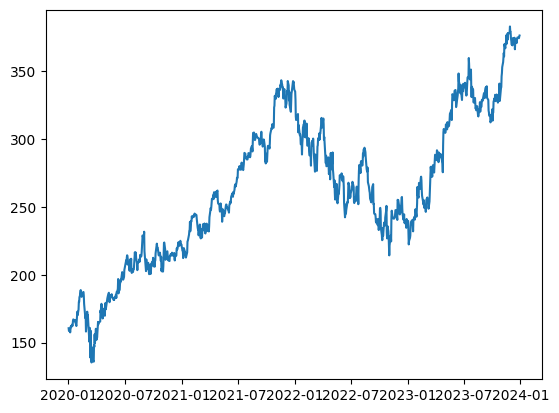

In [6]:
#plot chart
# plt.style.use('seaborn-muted')
plt.plot(price.Close)
plt.show()

In [7]:
#calculate daily return
price['Return'] = price.Close / price.Close.shift(1)
price.Return.iat[0] = 1
price['Bench_Bal'] = STARTING_BALANCE * price.Return.cumprod()

price

,Close,Return,Bench_Bal
Date,,,
2020-01-02,160.619995,1.000000,10000.000000
2020-01-03,158.619995,0.987548,9875.482502
2020-01-06,159.029999,1.002585,9901.008817
2020-01-07,157.580002,0.990882,9810.733820
2020-01-08,160.089996,1.015928,9967.002939
...,...,...,...
2023-12-22,374.579987,1.002784,23320.881457
2023-12-26,374.660004,1.000214,23325.863221
2023-12-27,374.070007,0.998425,23289.130787


In [8]:
#calculate drawdown
price['Bench_Peak'] = price.Bench_Bal.cummax()
price['Bench_DD'] = price.Bench_Bal - price.Bench_Peak

bench_dd = round((price.Bench_DD / price.Bench_Peak).min() * 100, 2)

bench_dd

-37.56

In [9]:
#calculate MACD
exp1 = price.Close.ewm(span = 12, adjust=False).mean()
exp2 = price.Close.ewm(span = 26, adjust=False).mean()

macd = exp1 - exp2
signal = macd.ewm(span = 9, adjust=False).mean()

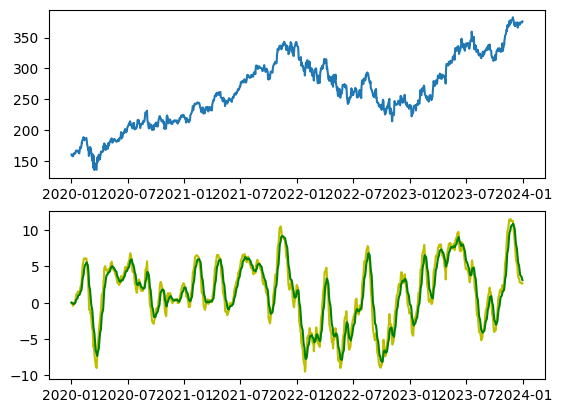

In [10]:
plt.figure()

#create subplot for price data
plt.subplot(211)
plt.plot(price.Close)

#create subplot for MACD
plt.subplot(212)
plt.plot(macd, color = 'y')
plt.plot(signal, color = 'g')

#show plot
plt.show()

In [11]:
#add column for entries
price['Long'] = macd > signal

price.tail()

,Close,Return,Bench_Bal,Bench_Peak,Bench_DD,Long
Date,,,,,,
2023-12-22,374.579987,1.002784,23320.881457,23826.424097,-505.542640,False
2023-12-26,374.660004,1.000214,23325.863221,23826.424097,-500.560876,False
2023-12-27,374.070007,0.998425,23289.130787,23826.424097,-537.293310,False
2023-12-28,375.279999,1.003235,23364.463341,23826.424097,-461.960755,False
2023-12-29,376.040009,1.002025,23411.780599,23826.424097,-414.643498,False


In [12]:
#calculate system return and balance
price['Sys_Ret'] = np.where(price.Long.shift(1) == True, price.Return, 1)

price['Sys_Bal'] = STARTING_BALANCE * price.Sys_Ret.cumprod()

price

,Close,Return,Bench_Bal,Bench_Peak,Bench_DD,Long,Sys_Ret,Sys_Bal
Date,,,,,,,,
2020-01-02,160.619995,1.000000,10000.000000,10000.000000,0.000000,False,1.0,10000.000000
2020-01-03,158.619995,0.987548,9875.482502,10000.000000,-124.517498,False,1.0,10000.000000
2020-01-06,159.029999,1.002585,9901.008817,10000.000000,-98.991183,False,1.0,10000.000000
2020-01-07,157.580002,0.990882,9810.733820,10000.000000,-189.266180,False,1.0,10000.000000
2020-01-08,160.089996,1.015928,9967.002939,10000.000000,-32.997061,False,1.0,10000.000000
...,...,...,...,...,...,...,...,...
2023-12-22,374.579987,1.002784,23320.881457,23826.424097,-505.542640,False,1.0,12449.584974
2023-12-26,374.660004,1.000214,23325.863221,23826.424097,-500.560876,False,1.0,12449.584974
2023-12-27,374.070007,0.998425,23289.130787,23826.424097,-537.293310,False,1.0,12449.584974


In [13]:
#calculate system drawdown
price['Sys_Peak'] = price.Sys_Bal.cummax()
price['Sys_DD'] = price.Sys_Bal - price.Sys_Peak

sys_dd = round((price.Sys_DD / price.Sys_Peak).min() * 100, 2)

sys_dd

-38.11

In [14]:
#calculate metrics
bench_return = round(((price.Bench_Bal[-1]/price.Bench_Bal[0]) - 1) * 100, 2)
bench_cagr = round(((((price.Bench_Bal[-1]/price.Bench_Bal[0])**(1/YEARS))-1)*100), 2)
sys_ret = round(((price.Sys_Bal[-1]/price.Sys_Bal[0]) - 1) * 100, 2)
sys_cagr = round(((((price.Sys_Bal[-1]/price.Sys_Bal[0])**(1/YEARS))-1)*100), 2)

print(f'Benchmark Total return: {bench_return}%')
print(f'Benchmark CAGR: {bench_cagr}%')
print(f'Benchmark DD: {bench_dd}%')
print('')
print(f'System Total return: {sys_ret}%')
print(f'System CAGR: {sys_cagr}%')
print(f'System DD: {sys_dd}%')

Benchmark Total return: 134.12%
Benchmark CAGR: 23.7%
Benchmark DD: -37.56%

System Total return: 24.5%
System CAGR: 5.63%
System DD: -38.11%


/var/folders/1v/lpjl6vj906s43r87d8bhvdb80000gn/T/ipykernel_33184/1587932551.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  bench_return = round(((price.Bench_Bal[-1]/price.Bench_Bal[0]) - 1) * 100, 2)
/var/folders/1v/lpjl6vj906s43r87d8bhvdb80000gn/T/ipykernel_33184/1587932551.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  bench_cagr = round(((((price.Bench_Bal[-1]/price.Bench_Bal[0])**(1/YEARS))-1)*100), 2)
/var/folders/1v/lpjl6vj906s43r87d8bhvdb80000gn/T/ipykernel_33184/1587932551.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always

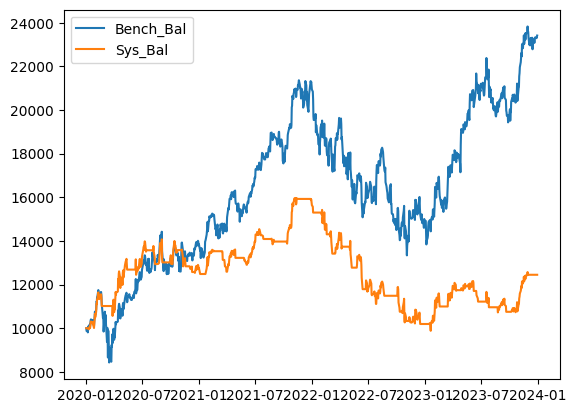

In [15]:
plt.plot(price.Bench_Bal, label='Bench_Bal')
plt.plot(price.Sys_Bal, label='Sys_Bal')
plt.legend()
plt.show()

In [16]:
#define list of ETFs to backtest
symbols = ['MSFT','^GSPC', '^DJI', '^IXIC', '^RUT', '^N225']

In [17]:
#create backtesting function
import yfinance as yf
def backtest(symbol):
    #download data

    price = yf.download(symbol, START, END)
    # price = pdr.get_data_yahoo(symbol, START, END)

    #remove columns
    price = price.drop(['Open', 'High', 'Low', 'Volume', 'Adj Close'], axis=1)

    #calculate daily return
    price['Return'] = price.Close / price.Close.shift(1)
    price.Return.iat[0] = 1
    price['Bench_Bal'] = STARTING_BALANCE * price.Return.cumprod()

    #calculate drawdown
    price['Bench_Peak'] = price.Bench_Bal.cummax()
    price['Bench_DD'] = price.Bench_Bal - price.Bench_Peak

    #calculate MACD
    exp1 = price.Close.ewm(span=12, adjust=False).mean()
    exp2 = price.Close.ewm(span=26, adjust=False).mean()

    macd = exp1 - exp2
    signal = macd.ewm(span=9, adjust=False).mean()

    #add column for long entries based on MACD signal
    price['Long'] = macd > signal

    #calculate system return and balance
    price['Sys_Return'] = np.where(price.Long.shift(1) == True, price.Return, 1)
    price['Sys_Bal'] = STARTING_BALANCE * price.Sys_Return.cumprod()

    #calculate system drawdown
    price['Sys_Peak'] = price.Sys_Bal.cummax()
    price['Sys_DD'] = price.Sys_Bal - price.Sys_Peak

    #calculate metrics
    bench_return = round(((price.Bench_Bal[-1]/price.Bench_Bal[0]) - 1) * 100, 2)
    bench_cagr = round(((((price.Bench_Bal[-1]/price.Bench_Bal[0])**(1/YEARS))-1)*100), 2)
    bench_dd = round((price.Bench_DD / price.Bench_Peak).min() * 100, 2)
    sys_return = round(((price.Sys_Bal[-1]/price.Sys_Bal[0]) - 1) * 100, 2)
    sys_cagr = round(((((price.Sys_Bal[-1]/price.Sys_Bal[0])**(1/YEARS))-1)*100), 2)
    sys_dd = round(((price.Sys_DD / price.Sys_Peak).min()) * 100, 2)

    return bench_cagr, sys_cagr

In [18]:
#backtest multiple symbols
bc = []
sc = []


for symbol in symbols:
    bench_cagr, sys_cagr = backtest(symbol)
    bc.append(bench_cagr)
    sc.append(sys_cagr)

[*********************100%%**********************]  1 of 1 completed
/var/folders/1v/lpjl6vj906s43r87d8bhvdb80000gn/T/ipykernel_33184/4227838091.py:40: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  bench_return = round(((price.Bench_Bal[-1]/price.Bench_Bal[0]) - 1) * 100, 2)
/var/folders/1v/lpjl6vj906s43r87d8bhvdb80000gn/T/ipykernel_33184/4227838091.py:41: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  bench_cagr = round(((((price.Bench_Bal[-1]/price.Bench_Bal[0])**(1/YEARS))-1)*100), 2)
/var/folders/1v/lpjl6vj906s43r87d8bhvdb80000gn/T/ipykernel_33184/4227838091.py:43: FutureWarning: Series.__getitem__ treating keys a

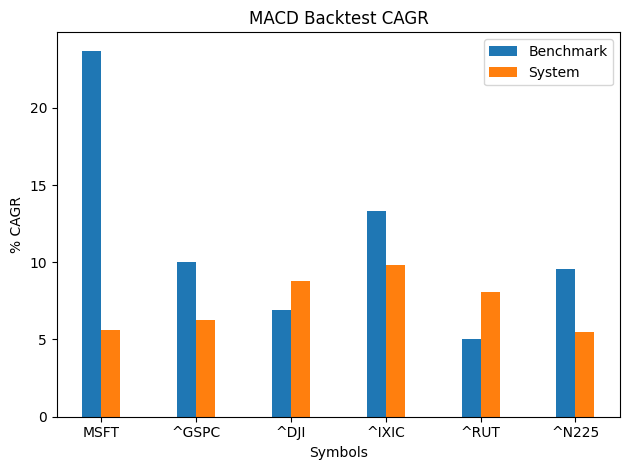

In [19]:
#plot data
x_indices = np.arange(len(symbols))
width = 0.2

plt.bar(x_indices - width / 2, bc, width = width, label = 'Benchmark')
plt.bar(x_indices + width / 2, sc, width = width, label = 'System')

plt.xticks(ticks = x_indices, labels = symbols)

plt.legend()

plt.title('MACD Backtest CAGR')
plt.xlabel('Symbols')
plt.ylabel('% CAGR')
plt.tight_layout()

plt.show()